In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import flask as Flask
import sqlalchemy

In [2]:
# Read in csv file and display data
pollution = pd.read_csv("data\global air pollutiondataset.csv")
pollution.head()

,City_ID,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,1,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,5,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [3]:
# summary of the global air pollution dataset
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   City_ID             23463 non-null  int64 
 1   Country             23036 non-null  object
 2   City                23462 non-null  object
 3   AQI_Value           23463 non-null  int64 
 4   AQI_Category        23463 non-null  object
 5   CO_AQI_Value        23463 non-null  int64 
 6   CO_AQI_Category     23463 non-null  object
 7   Ozone_AQI_Value     23463 non-null  int64 
 8   Ozone_AQI_Category  23463 non-null  object
 9   NO2_AQI_Value       23463 non-null  int64 
 10  NO2_AQI_Category    23463 non-null  object
 11  PM2.5_AQI_Value     23463 non-null  int64 
 12  PM2.5_AQI_Category  23463 non-null  object
dtypes: int64(6), object(7)
memory usage: 2.3+ MB


In [4]:
# See all the countries
country = pollution["Country"].unique()
print(country)

['Russian Federation' 'Brazil' 'Italy' 'Poland' 'France'
 'United States of America' 'Germany' 'Belgium' 'Egypt' 'China'
 'Netherlands' 'India' 'Pakistan' 'Republic of North Macedonia' 'Colombia'
 'Romania' 'Indonesia' 'Finland' 'South Africa'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'Haiti' 'Somalia' 'Philippines' 'Latvia'
 'Chad' 'New Zealand' 'Tunisia' 'Viet Nam' 'Iran (Islamic Republic of)'
 'Mexico' 'Japan' 'El Salvador' 'Bulgaria' 'Nigeria' 'South Sudan'
 'Guatemala' 'Ireland' 'Turkey' 'Peru' 'Democratic Republic of the Congo'
 'Canada' 'Switzerland' 'Denmark' 'Cameroon' 'Australia' 'Portugal'
 "Côte d'Ivoire" 'Sweden' 'Ethiopia' 'Thailand' 'Hungary' 'Kazakhstan'
 'Israel' 'Spain' 'Myanmar' 'Papua New Guinea' 'Madagascar' 'Lithuania'
 'Ghana' 'Azerbaijan' 'Armenia' 'Ukraine' 'Malaysia' 'Serbia' 'Slovakia'
 'Gambia' 'Ecuador' 'Bosnia and Herzegovina' 'Czechia' 'Argentina'
 'Dominican Republic' 'Guinea' 'Bolivia (Plurinational State of)

In [5]:
# Find out how many countries are in the dataset
print(len(country))

176


In [6]:
# Find out how many Cities are in the dataset
city = pollution["City"].unique()
print(len(city))

23463


In [7]:
#remove nulls from dataset and reorganize columns
pollution_cleaned = pollution.dropna()
pollution_df = pollution_cleaned[['City_ID', 'City', 'Country', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category']]
pollution_df

,City_ID,City,Country,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,1,Praskoveya,Russian Federation,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,2,Presidente Dutra,Brazil,41,Good,1,Good,5,Good,1,Good,41,Good
2,3,Priolo Gargallo,Italy,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,4,Przasnysz,Poland,34,Good,1,Good,34,Good,0,Good,20,Good
4,5,Punaauia,France,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,23459,Gursahaiganj,India,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,23460,Sceaux,France,50,Good,1,Good,20,Good,5,Good,50,Good
23460,23461,Mormugao,India,50,Good,1,Good,22,Good,1,Good,50,Good
23461,23462,Westerville,United States of America,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [8]:
pollution_df

,City_ID,City,Country,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,1,Praskoveya,Russian Federation,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,2,Presidente Dutra,Brazil,41,Good,1,Good,5,Good,1,Good,41,Good
2,3,Priolo Gargallo,Italy,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,4,Przasnysz,Poland,34,Good,1,Good,34,Good,0,Good,20,Good
4,5,Punaauia,France,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,23459,Gursahaiganj,India,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,23460,Sceaux,France,50,Good,1,Good,20,Good,5,Good,50,Good
23460,23461,Mormugao,India,50,Good,1,Good,22,Good,1,Good,50,Good
23461,23462,Westerville,United States of America,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [9]:
# Make City Table
city_table =  pollution_df[["City_ID", "City", "Country"]]
city_table


,City_ID,City,Country
0,1,Praskoveya,Russian Federation
1,2,Presidente Dutra,Brazil
2,3,Priolo Gargallo,Italy
3,4,Przasnysz,Poland
4,5,Punaauia,France
...,...,...,...
23458,23459,Gursahaiganj,India
23459,23460,Sceaux,France
23460,23461,Mormugao,India
23461,23462,Westerville,United States of America


In [10]:
#Save Tables to csv file
city_table.to_csv("data\City_Table.csv", encoding ="UTF-8", index=False)
pollution_df.to_csv("data\Global_Air_Pollution.csv", encoding = "UTF-8", index=False)

In [11]:
overall_table = pollution_df.drop(columns = ['City_ID', 'City', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category'])
overall_table

,Country,AQI_Value,AQI_Category
0,Russian Federation,51,Moderate
1,Brazil,41,Good
2,Italy,66,Moderate
3,Poland,34,Good
4,France,22,Good
...,...,...,...
23458,India,184,Unhealthy
23459,France,50,Good
23460,India,50,Good
23461,United States of America,71,Moderate


In [12]:
# Setting up tables for each pollutant
CO_table = pollution_df.drop(columns = ['City_ID', 'City', 'AQI_Value', 'AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category'])
Ozone_table = pollution_df.drop(columns = ['City_ID', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category'])
NO2_table = pollution_df.drop(columns = ['City_ID', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'PM2.5_AQI_Value', 'PM2.5_AQI_Category'])
PM_table = pollution_df.drop(columns = ['City_ID', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value', 'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category', 'NO2_AQI_Value', 'NO2_AQI_Category'])


In [13]:
# Find and sort average overall AQI showing top 10
AQI_mean = pollution_df.groupby("Country")["AQI_Value"].mean()
AQI_mean.sort_values(ascending=False).head(10)


Country
Republic of Korea       421.000000
Bahrain                 188.000000
Mauritania              179.000000
Pakistan                178.788274
United Arab Emirates    163.666667
Aruba                   163.000000
Kuwait                  162.000000
Qatar                   157.500000
India                   152.964228
Senegal                 152.424242
Name: AQI_Value, dtype: float64

In [14]:
# Find and sort average overall AQI showing lowest 10
AQI_mean.sort_values(ascending=False).tail(10)

Country
Argentina                           28.235294
Uruguay                             26.653846
Seychelles                          26.000000
Bhutan                              26.000000
Papua New Guinea                    24.866667
Bolivia (Plurinational State of)    23.787879
Iceland                             23.000000
Maldives                            19.000000
Solomon Islands                     18.000000
Palau                               16.000000
Name: AQI_Value, dtype: float64

In [15]:
# Find and sort average Carbon Monoxide AQI showing top 10
CO_mean = pollution_df.groupby ("Country")["CO_AQI_Value"].mean()
CO_mean.sort_values(ascending=False).head(10)

Country
Republic of Korea                   27.000000
South Africa                         5.379310
Democratic Republic of the Congo     5.285714
Kingdom of Eswatini                  4.666667
Nigeria                              3.812500
Chile                                3.802469
Rwanda                               3.615385
China                                3.417610
Angola                               3.148148
Lesotho                              2.800000
Name: CO_AQI_Value, dtype: float64

In [16]:
# Find and sort average Carbon Monoxide AQI showing lowest 10
CO_mean.sort_values(ascending=False).tail(10)

Country
Vanuatu             0.0
Maldives            0.0
Palau               0.0
Papua New Guinea    0.0
Solomon Islands     0.0
Barbados            0.0
Saint Lucia         0.0
Seychelles          0.0
Cabo Verde          0.0
Aruba               0.0
Name: CO_AQI_Value, dtype: float64

In [17]:
# Find and sort average Ozone AQI showing top 10
Ozone_mean = pollution_df.groupby("Country")["Ozone_AQI_Value"].mean()
Ozone_mean.sort_values(ascending=False).head(10)

Country
United Arab Emirates    159.666667
Qatar                   139.000000
Kuwait                  135.666667
Bahrain                 127.000000
Oman                     97.833333
Pakistan                 89.143322
China                    88.319497
State of Palestine       85.000000
Saudi Arabia             77.071429
Iraq                     69.714286
Name: Ozone_AQI_Value, dtype: float64

In [18]:
# Find and sort average Ozone AQI showing lowest 10
Ozone_mean.sort_values(ascending=False).tail(10)

Country
Central African Republic            12.233333
Peru                                12.000000
Guatemala                           11.157025
Honduras                            10.785714
Ecuador                             10.666667
South Sudan                         10.416667
Chile                               10.049383
Colombia                             9.776000
Bolivia (Plurinational State of)     8.333333
Republic of Korea                    0.000000
Name: Ozone_AQI_Value, dtype: float64

In [19]:
# Find and sort average Nitrogen Dioxide AQI showing top 10
NO2_mean = pollution_df.groupby ("Country")["NO2_AQI_Value"].mean()
NO2_mean.sort_values(ascending=False).head(10)

Country
Republic of Korea           91.000000
Kuwait                      13.666667
El Salvador                  9.393939
Algeria                      9.333333
Chile                        8.592593
United States of America     8.541435
China                        7.093082
Dominican Republic           6.973684
Costa Rica                   6.921053
Guatemala                    6.842975
Name: NO2_AQI_Value, dtype: float64

In [20]:
# Find and sort average Nitrogen Dioxide AQI showing lowest 10
NO2_mean.sort_values(ascending=False).tail(10)

Country
Saint Lucia                 0.0
Georgia                     0.0
Central African Republic    0.0
Seychelles                  0.0
Suriname                    0.0
Eritrea                     0.0
Equatorial Guinea           0.0
Comoros                     0.0
Solomon Islands             0.0
Namibia                     0.0
Name: NO2_AQI_Value, dtype: float64

In [21]:
# Find and sort average Particulate Matter showing top 10
# (with a diameter of 2.5 micrometers or less of the city) AQI
PM_mean = pollution_df.groupby ("Country")["PM2.5_AQI_Value"].mean()
PM_mean.sort_values(ascending=False).head(10)

Country
Republic of Korea       415.000000
Bahrain                 188.000000
Mauritania              179.000000
Pakistan                173.110749
Aruba                   163.000000
Kuwait                  162.000000
United Arab Emirates    152.666667
Senegal                 152.424242
India                   149.463023
Saudi Arabia            149.285714
Name: PM2.5_AQI_Value, dtype: float64

In [22]:
# Find and sort average Particulate Matter showing lowest 10
# (with a diameter of 2.5 micrometers or less of the city) AQI
PM_mean.sort_values(ascending=False).tail(10)

Country
Andorra             22.000000
Uruguay             21.692308
Finland             21.629630
Sweden              21.041237
Papua New Guinea    20.533333
Norway              18.571429
Iceland             18.333333
Maldives            15.000000
Palau                7.000000
Solomon Islands      6.000000
Name: PM2.5_AQI_Value, dtype: float64

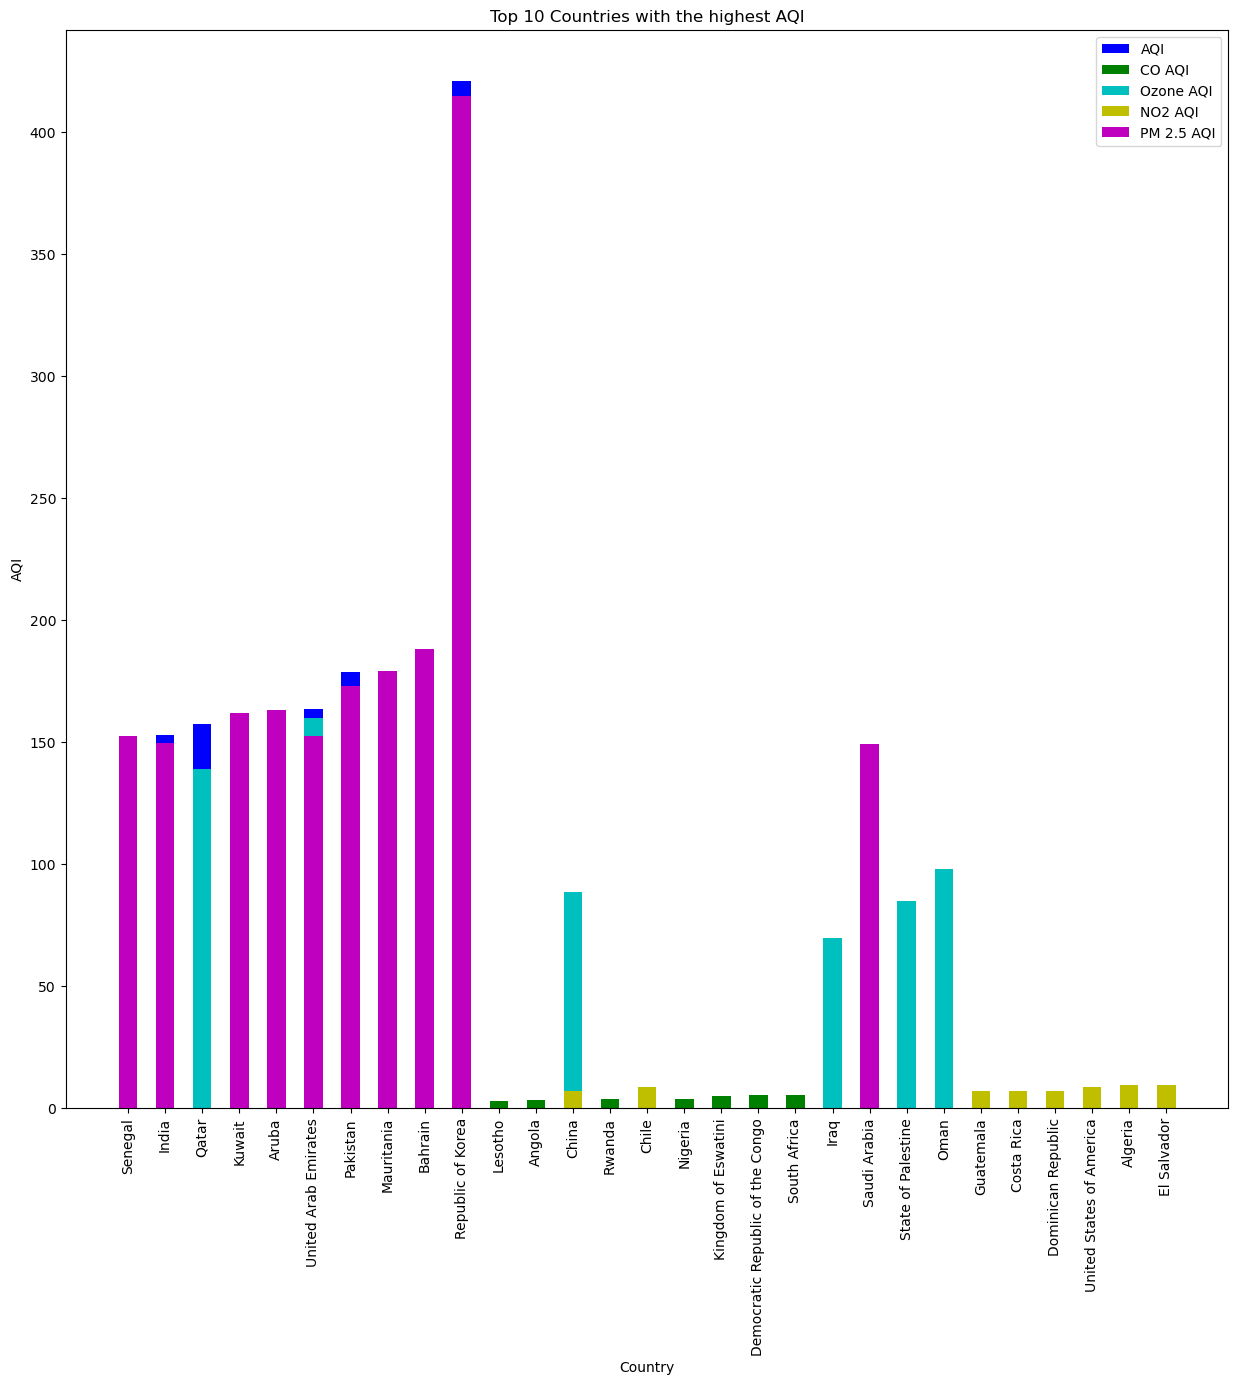

In [43]:
# Create plot for top pollutants
# plot:   
fig = plt.figure(figsize=(15,14)) 
plt.bar(["Senegal", "India", "Qatar", "Kuwait", "Aruba", "United Arab Emirates","Pakistan","Mauritania", "Bahrain", "Republic of Korea"],
        [152.424242,152.964228,157.500000,162.000000,163.000000,163.666667,178.788274,179.000000,188.000000,421.000000],
label="AQI",color='b',width=0.5)
plt.bar(["Lesotho", "Angola", "China", "Rwanda", "Chile", "Nigeria", "Kingdom of Eswatini", "Democratic Republic of the Congo", "South Africa", "Republic of Korea"],
        [2.800000,3.148148,3.417610,3.615385,3.802469,3.812500,4.666667,5.285714,5.379310,27.000000],
label="CO AQI", color='g',width=.5)
plt.bar(["Iraq", "Saudi Arabia", "State of Palestine", "China", "Pakistan", "Oman", "Bahrain", "Kuwait", "Qatar", "United Arab Emirates"],
        [69.714286,77.071429,85.000000,88.319497,89.143322,97.833333,127.000000,135.666667,139.000000,159.666667],
label="Ozone AQI", color='c',width=.5)
plt.bar(["Guatemala","Costa Rica", "Dominican Republic", "China", "United States of America", "Chile", "Algeria", "El Salvador", "Kuwait","Republic of Korea"],
        [6.842975,6.921053,6.973684,7.093082,8.541435,8.592593,9.333333,9.393939,13.666667,91.000000],
label="NO2 AQI", color='y',width=.5)
plt.bar(["Saudi Arabia","India","Senegal","United Arab Emirates","Kuwait","Aruba","Pakistan","Mauritania","Bahrain","Republic of Korea"],
        [149.285714,149.463023,152.424242,152.666667,162.000000,163.000000,173.110749,179.000000,188.000000,415.000000],
label="PM 2.5 AQI", color='m',width=.5)
plt.legend()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('AQI')
plt.title('Top 10 Countries with the highest AQI')
plt.savefig("Top_10_Countries", dpi=70, bbox_inches = 'tight')
# Print the chart
plt.show()

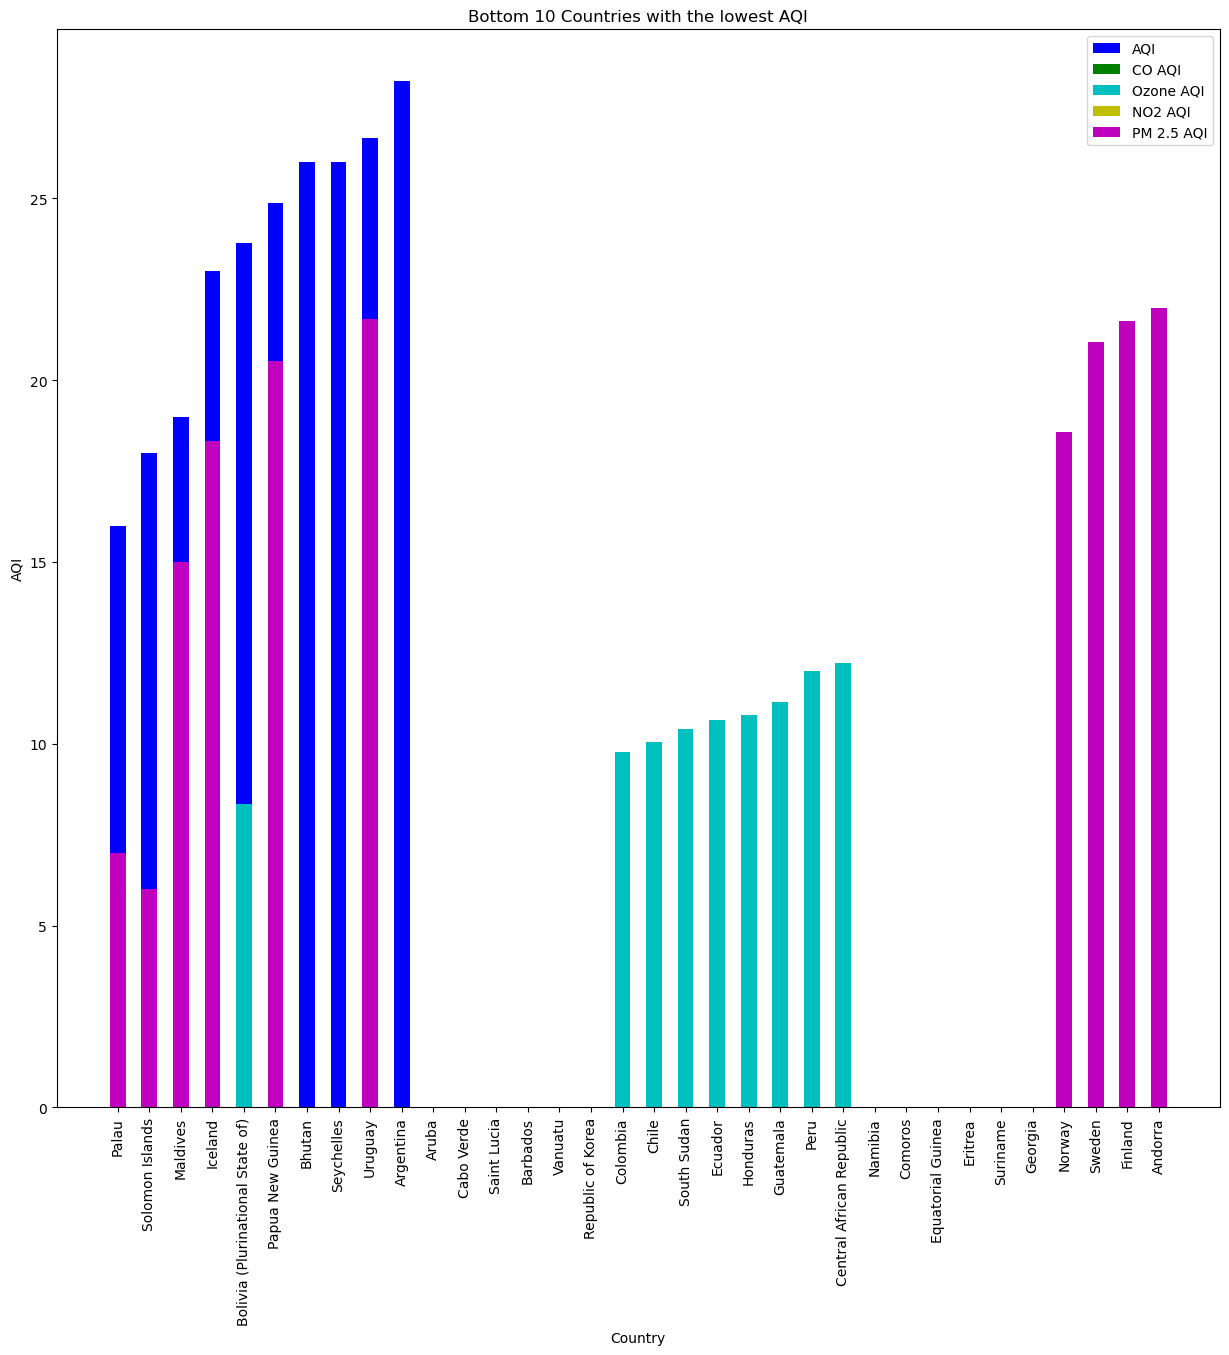

In [44]:
# Create plot for lowest pollutants
# plot:    
fig = plt.figure(figsize=(15,14)) 
plt.bar(["Palau","Solomon Islands","Maldives","Iceland","Bolivia (Plurinational State of)","Papua New Guinea","Bhutan","Seychelles","Uruguay","Argentina"],
        [16.000000,18.000000,19.000000,23.000000,23.787879,24.866667,26.000000,26.000000,26.653846,28.235294],
label="AQI",color='b',width=0.5)
plt.bar(["Aruba","Cabo Verde","Seychelles","Saint Lucia","Barbados", "Solomon Islands", "Papua New Guinea","Palau","Maldives","Vanuatu"],
        [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
label="CO AQI", color='g',width=.5)
plt.bar([ "Republic of Korea","Bolivia (Plurinational State of)","Colombia","Chile","South Sudan","Ecuador","Honduras","Guatemala","Peru","Central African Republic"],
        [0.000000, 8.333333,9.776000,10.049383,10.416667,10.666667,10.785714,11.157025,12.000000,12.233333],
label="Ozone AQI", color='c',width=.5)
plt.bar(["Namibia","Solomon Islands","Comoros","Equatorial Guinea","Eritrea","Suriname","Seychelles","Central African Republic","Georgia","Saint Lucia"],
        [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
label="NO2 AQI", color='y',width=.5)
plt.bar(["Solomon Islands","Palau","Maldives","Iceland","Norway","Papua New Guinea","Sweden","Finland","Uruguay","Andorra"],
[6.000000, 7.000000,15.000000,18.333333,18.571429,20.533333,21.041237,21.629630,21.692308,22.000000],
label="PM 2.5 AQI", color='m',width=.5)
plt.legend()
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('AQI')
plt.title('Bottom 10 Countries with the lowest AQI')
plt.savefig("Bottom_10_Countries", dpi=90, bbox_inches = 'tight')
# Print the chart
plt.show()


In [25]:
#Find min and max of "Good" AQI Category
Good_AQI = pollution_df.loc[pollution_df["AQI_Category"] == "Good", :]
print(f'AQI (Good) ranges from Min: {Good_AQI["AQI_Value"].min()} and Max: {Good_AQI["AQI_Value"].max()}')

#Find min and max of "Moderate" AQI Category
Mod_AQI = pollution_df.loc[pollution_df["AQI_Category"] == "Moderate", :]
print(f'AQI (Moderate) ranges from Min: {Mod_AQI["AQI_Value"].min()} and Max: {Mod_AQI["AQI_Value"].max()}')

#Find min and max of "Unhealthy for Sensitive Groups" AQI Category
Sens_AQI = pollution_df.loc[pollution_df["AQI_Category"] == "Unhealthy for Sensitive Groups", :]
print(f'AQI (Unhealthy for Sensitive Groups) ranges from Min: {Sens_AQI["AQI_Value"].min()} and Max: {Sens_AQI["AQI_Value"].max()}')

#Find max of "Unhealthy" AQI Category
Unhealthy_AQI = pollution_df.loc[pollution_df["AQI_Category"] == "Unhealthy", :]
print(f'AQI (Unhealthy) ranges from Min: {Unhealthy_AQI["AQI_Value"].min()} and {Unhealthy_AQI["AQI_Value"].max()}')

AQI (Good) ranges from Min: 6 and Max: 50
AQI (Moderate) ranges from Min: 51 and Max: 99
AQI (Unhealthy for Sensitive Groups) ranges from Min: 100 and Max: 149
AQI (Unhealthy) ranges from Min: 150 and 200


In [26]:
#Find out the pollution in the United States
USA_AQI = pollution_df.loc[pollution_df["Country"] == "United States of America", :]
USA_AQI["AQI_Value"].mean()

59.74059888579387

In [27]:
#Find min and max of "Good" CO AQI Category
Good_CO_AQI = pollution_df.loc[pollution_df["CO_AQI_Category"] == "Good", :]
print(f'Carbon Monoxide AQI (Good) ranges from Min: {Good_CO_AQI["CO_AQI_Value"].min()} and Max: {Good_CO_AQI["CO_AQI_Value"].max()}')

#Find min and max of "Moderate" CO AQI Category
Mod_CO_AQI = pollution_df.loc[pollution_df["CO_AQI_Category"] == "Moderate", :]
print(f'Carbon Monoxide AQI (Moderate) ranges from Min: {Mod_CO_AQI["AQI_Value"].min()} and Max: {Mod_CO_AQI["CO_AQI_Value"].max()}')

#Find min and max of "Unhealthy for Sensitive Groups" CO AQI Category
Sens_CO_AQI = pollution_df.loc[pollution_df["CO_AQI_Category"] == "Unhealthy for Sensitive Groups", :]
print(f'Carbon Monoxide AQI (Unhealthy for Sensitive Groups) ranges from Min: {Sens_CO_AQI["CO_AQI_Value"].min()} and Max: {Sens_CO_AQI["CO_AQI_Value"].max()}')

#Find max of "Unhealthy" CO AQI Category
Unhealthy_CO_AQI = pollution_df.loc[pollution_df["CO_AQI_Category"] == "Unhealthy", :]
print(f'Carbon Monoxide AQI (Unhealthy) ranges from Min: {Unhealthy_CO_AQI["CO_AQI_Value"].min()} and {Unhealthy_CO_AQI["CO_AQI_Value"].max()}')

Carbon Monoxide AQI (Good) ranges from Min: 0 and Max: 49
Carbon Monoxide AQI (Moderate) ranges from Min: 209 and Max: 67
Carbon Monoxide AQI (Unhealthy for Sensitive Groups) ranges from Min: 133 and Max: 133
Carbon Monoxide AQI (Unhealthy) ranges from Min: nan and nan


In [28]:
#Find out the Carbon Monoxide pollution in the United States
USA_AQI["CO_AQI_Value"].mean()

1.456824512534819

In [29]:
#Find min and max of "Good" Ozone AQI Category
Good_Ozone_AQI = pollution_df.loc[pollution_df["Ozone_AQI_Category"] == "Good", :]
print(f'Ozone AQI (Good) ranges from Min: {Good_Ozone_AQI["Ozone_AQI_Value"].min()} and Max: {Good_Ozone_AQI["Ozone_AQI_Value"].max()}')

#Find min and max of "Moderate" Ozone AQI Category
Mod_Ozone_AQI = pollution_df.loc[pollution_df["Ozone_AQI_Category"] == "Moderate", :]
print(f'Ozone AQI (Moderate) ranges from Min: {Mod_Ozone_AQI["Ozone_AQI_Value"].min()} and Max: {Mod_Ozone_AQI["Ozone_AQI_Value"].max()}')

#Find min and max of "Unhealthy for Sensitive Groups" Ozone AQI Category
Sens_Ozone_AQI = pollution_df.loc[pollution_df["Ozone_AQI_Category"] == "Unhealthy for Sensitive Groups", :]
print(f'Ozone AQI (Unhealthy for Sensitive Groups) ranges from Min: {Sens_Ozone_AQI["Ozone_AQI_Value"].min()} and Max: {Sens_Ozone_AQI["Ozone_AQI_Value"].max()}')

#Find max of "Unhealthy" Ozone AQI Category
Unhealthy_Ozone_AQI = pollution_df.loc[pollution_df["Ozone_AQI_Category"] == "Unhealthy", :]
print(f'Ozone AQI (Unhealthy) ranges from Min: {Unhealthy_Ozone_AQI["Ozone_AQI_Value"].min()} and {Unhealthy_Ozone_AQI["Ozone_AQI_Value"].max()}')

Ozone AQI (Good) ranges from Min: 0 and Max: 50
Ozone AQI (Moderate) ranges from Min: 51 and Max: 99
Ozone AQI (Unhealthy for Sensitive Groups) ranges from Min: 100 and Max: 149
Ozone AQI (Unhealthy) ranges from Min: 150 and 200


In [30]:
#Find out the Ozone pollution in the United States
USA_AQI["Ozone_AQI_Value"].mean()

27.619777158774372

In [31]:
#Find min and max of "Good" Nitrogen Dioxide AQI Category
Good_NO2_AQI = pollution_df.loc[pollution_df["NO2_AQI_Category"] == "Good", :]
print(f'Nitrogen Dioxide AQI (Good) ranges from Min: {Good_NO2_AQI["NO2_AQI_Value"].min()} and Max: {Good_NO2_AQI["NO2_AQI_Value"].max()}')

#Find min and max of "Moderate" Nitrogen Dioxide AQI Category
Mod_NO2_AQI = pollution_df.loc[pollution_df["NO2_AQI_Category"] == "Moderate", :]
print(f'Nitrogen Dioxide AQI (Moderate) ranges from Min: {Mod_NO2_AQI["NO2_AQI_Value"].min()} and Max: {Mod_NO2_AQI["NO2_AQI_Value"].max()}')

#Find min and max of "Unhealthy for Sensitive Groups" Nitrogen Dioxide AQI Category
Sens_NO2_AQI = pollution_df.loc[pollution_df["NO2_AQI_Category"] == "Unhealthy for Sensitive Groups", :]
print(f'Nitrogen Dioxide AQI (Unhealthy for Sensitive Groups) ranges from Min: {Sens_NO2_AQI["NO2_AQI_Value"].min()} and Max: {Sens_NO2_AQI["NO2_AQI_Value"].max()}')

#Find max of "Unhealthy" Nitrogen Dioxide AQI Category
Unhealthy_NO2_AQI = pollution_df.loc[pollution_df["NO2_AQI_Category"] == "Unhealthy", :]
print(f'Nitrogen Dioxide AQI (Unhealthy) ranges from Min: {Unhealthy_NO2_AQI["NO2_AQI_Value"].min()} and {Unhealthy_NO2_AQI["NO2_AQI_Value"].max()}')

Nitrogen Dioxide AQI (Good) ranges from Min: 0 and Max: 49
Nitrogen Dioxide AQI (Moderate) ranges from Min: 51 and Max: 91
Nitrogen Dioxide AQI (Unhealthy for Sensitive Groups) ranges from Min: nan and Max: nan
Nitrogen Dioxide AQI (Unhealthy) ranges from Min: nan and nan


In [32]:
# Find out the Nitrogen Dioxide Pollution in the United States
USA_AQI["NO2_AQI_Value"].mean()

8.541434540389972

In [33]:
#Find min and max of "Good" AQI Category
Good_PM25_AQI = pollution_df.loc[pollution_df["PM2.5_AQI_Category"] == "Good", :]
print(f'Particulate Matter with a diameter of 2.5 micrometers or less of the city AQI (Good) ranges from Min: {Good_PM25_AQI["PM2.5_AQI_Value"].min()} and Max: {Good_PM25_AQI["PM2.5_AQI_Value"].max()}')

#Find min and max of "Moderate" AQI Category
Mod_PM25_AQI = pollution_df.loc[pollution_df["PM2.5_AQI_Category"] == "Moderate", :]
print(f'Particulate Matter with a diameter of 2.5 micrometers or less of the city AQI (Moderate) ranges from Min: {Mod_PM25_AQI["PM2.5_AQI_Value"].min()} and Max: {Mod_PM25_AQI["PM2.5_AQI_Value"].max()}')

#Find min and max of "Unhealthy for Sensitive Groups" AQI Category
Sens_PM25_AQI = pollution_df.loc[pollution_df["PM2.5_AQI_Category"] == "Unhealthy for Sensitive Groups", :]
print(f'Particulate Matter with a diameter of 2.5 micrometers or less of the city AQI (Unhealthy for Sensitive Groups) ranges from Min: {Sens_PM25_AQI["PM2.5_AQI_Value"].min()} and Max: {Sens_PM25_AQI["PM2.5_AQI_Value"].max()}')

#Find max of "Unhealthy" AQI Category
Unhealthy_PM25_AQI = pollution_df.loc[pollution_df["PM2.5_AQI_Category"] == "Unhealthy", :]
print(f'Particulate Matter with a diameter of 2.5 micrometers or less of the city AQI (Unhealthy) ranges from Min: {Unhealthy_PM25_AQI["PM2.5_AQI_Value"].min()} and {Unhealthy_PM25_AQI["PM2.5_AQI_Value"].max()}')

Particulate Matter with a diameter of 2.5 micrometers or less of the city AQI (Good) ranges from Min: 0 and Max: 50
Particulate Matter with a diameter of 2.5 micrometers or less of the city AQI (Moderate) ranges from Min: 51 and Max: 99
Particulate Matter with a diameter of 2.5 micrometers or less of the city AQI (Unhealthy for Sensitive Groups) ranges from Min: 100 and Max: 149
Particulate Matter with a diameter of 2.5 micrometers or less of the city AQI (Unhealthy) ranges from Min: 150 and 200


In [34]:
#Find out the Particulate Matter (with a diameter of 2.5 micrometers or less of the city) pollution in the United States
USA_AQI["PM2.5_AQI_Value"].mean()

58.051532033426184